In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, mean_squared_error


In [3]:
# Step 1: Load the dataset
df = pd.read_csv("/home/sargam/Downloads/Social_Network_Ads.csv")
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [6]:
# Step 2: Data Preprocessing
# 2.1: One-hot encode 'Gender' column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [8]:
# 2.2: Drop 'User ID' column as it's not relevant
df = df.drop(['User ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
 3   Gender_Male      400 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 9.9 KB


In [9]:
# Step 2.3: Remove outliers using the Quantile (IQR) method for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Only select numeric columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


In [10]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [11]:
# Remove outliers
df_no_outliers = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]


In [12]:
print("\nNull Values:")
print(df_no_outliers.isnull().sum())


Null Values:
Age                0
EstimatedSalary    0
Purchased          0
Gender_Male        0
dtype: int64


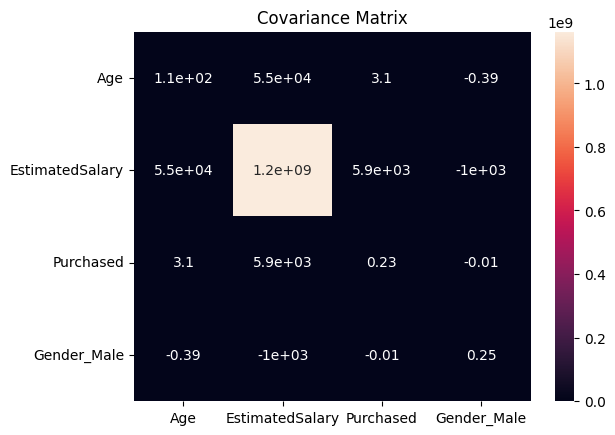

In [13]:

# Step 2.4: Covariance Matrix to select promising features
cov_matrix = df_no_outliers.cov()
sns.heatmap(cov_matrix, annot=True)
plt.title('Covariance Matrix')
plt.show()


In [14]:
# Step 3: Prepare the dataset
X = df_no_outliers.drop('Purchased', axis=1)  # Features excluding 'Purchased'
y = df_no_outliers['Purchased']  # Target variable


In [15]:
# Step 4: Split the dataset into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Step 5: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Step 6: Train the Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [18]:
# Step 7: Predict the test dataset
y_pred = logreg.predict(X_test)

In [19]:
# Step 8: Confusion Matrix Evaluation
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[50  2]
 [ 7 21]]


In [21]:
accuracy_percent = accuracy_score(y_test, y_pred) * 100
error_rate = 100 - accuracy_percent
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy_percent}%")
print(f"Error Rate: {error_rate}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Accuracy: 88.75%
Error Rate: 11.25%
Precision: 0.9130434782608695
Recall: 0.75


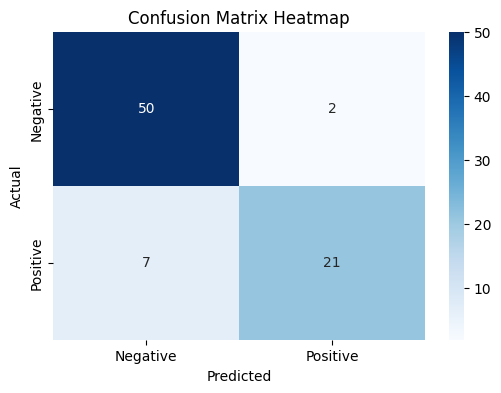

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Step 9: Comparison between Actual and Predicted
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [24]:
errors = (comparison_df['Actual'] != comparison_df['Predicted']).sum()
print(f'Number of misclassified instances: {errors}')


Number of misclassified instances: 9


In [25]:
# Step 10: False Positives and False Negatives
FP = ((comparison_df['Actual'] == 0) & (comparison_df['Predicted'] == 1)).sum()
FN = ((comparison_df['Actual'] == 1) & (comparison_df['Predicted'] == 0)).sum()

In [26]:
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

False Positives (FP): 2
False Negatives (FN): 7


In [27]:
# Step 12: Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 88.75%


In [28]:
# Step 13: Mean Squared Error for Training and Testing Set
y_train_pred = logreg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {train_mse:.4f}')

Training Mean Squared Error (MSE): 0.1844


In [29]:
test_mse = mean_squared_error(y_test, y_pred)
print(f'Testing Mean Squared Error (MSE): {test_mse:.4f}')


Testing Mean Squared Error (MSE): 0.1125
